# Sistemas de ecuaciones lineales: introducción

**Objetivo general**
- Plantear y resolver un problema en términos de la solución de un sistema de ecuaciones lineales.

**Objetivos particulares**
- Entender como plantear un problema en términos de un sistema de ecuaciones lineales.
- Usar funciones de la biblioteca `numpy` para resolver el problema.
- Comparar varios métodos para la solución de problemas más complejos.

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Algebra_Lineal_02">MACTI-Algebra_Lineal_02</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME, proyectos PE101019 y PE101922.**

<a name='1'></a>
## Planes de telefonía móvil.

Dos compañías de telefonía compiten por ganar clientes. En la tabla que sigue se muestra el costo de la renta y el costo por Megabyte (MB) de datos de cada compañía.

|    | Renta mensual | Costo por MB |
|:--:|:----: | :----------: |
| Compañía A  | $200$ | $0.10$       |
| Compañía B  | $20$  | $0.30$       |

**¿Cómo podríamos decidir cuál de estas companías conviene contratar?**

<a name='1-1'></a>
## Modelo matemático.
- Observamos en la tabla anterior que la compañía A tiene un precio fijo de 200 pesos mensuales que es 10 veces mayor al precio que cobra la compañía B (20 pesos). 
- Por otro lado, la compañía B cobra 0.30 pesos por cada MB, que es 3 veces mayor al precio por MB de la compañía A. 
- El precio final mensual de cada compañía depende básicamente de cuantos MB se usen. 

Podemos escribir la forma en que cambia el precio de cada compañía en función de los MB usados:

$$
\begin{array}{ccc}
P_A & = & 0.10 x + 200 \tag{1}\\
P_B & = & 0.30 x + 20
\end{array}
$$

donde $x$ representa el número de MB usados durante un mes. 

<div class="alert alert-success">

## Ejercicio 1. Gráfica de las rectas.

En el código siguiente completa las fórmulas para cada compañía de acuerdo con las ecuaciones dadas en $(1)$ y posteriormente ejecuta el código para obtener una gráfica de cómo cambia el precio en función de los MB utilizados.

</div>

In [1]:
# Importación de las bibliotecas numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

from macti.eval import *
quiz = Quiz('al02_01', 'notebooks', 'local')

Fórmulas a implementar:
$
\begin{array}{ccc}
P_A & = & 0.10 x + 200\\
P_B & = & 0.30 x + 20
\end{array}
$

In [2]:
# Definimos un arreglo con valores de los MB
# desde 0 hasta 1500 (1.5 GB) en pasos de 10.
x = np.linspace(0, 1500, 10)
print(x)

[   0.          166.66666667  333.33333333  500.          666.66666667
  833.33333333 1000.         1166.66666667 1333.33333333 1500.        ]


In [4]:
# Fórmula para la compañía A:
PA = 0.10 * x + 200
# Fórmula para la compañía B:
# PB = ...
### BEGIN SOLUTION
PB = 0.30 * x + 20

file_answer = FileAnswer()
file_answer.write('1', PB, 'La implementación de PB no es correcta.')
file_answer.to_file('al02_01')
### END SOLUTION

print('PA = {}'.format(PA))
print('Pb = {}'.format(PB))

El directorio :/home/jovyan/Temporal/macti/notebooks/.ans/Algebra_Lineal_02/ ya existe
Respuestas y retroalimentación almacenadas.
PA = [200.         216.66666667 233.33333333 250.         266.66666667
 283.33333333 300.         316.66666667 333.33333333 350.        ]
Pb = [ 20.  70. 120. 170. 220. 270. 320. 370. 420. 470.]


In [5]:
quiz.eval_numeric('1', PB)

――――――――――――――――――――――――――――――――――――――――
1 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


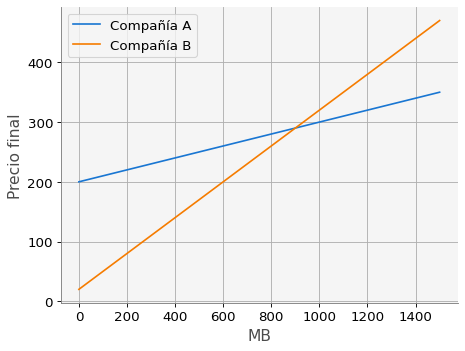

In [6]:
# Gráfica de las rectas
plt.plot(x, PA, label = 'Compañía A')
plt.plot(x, PB, label = 'Compañía B')

# Decoración de la gráfica
plt.xlabel('MB')
plt.ylabel('Precio final')
plt.legend()
plt.grid()
plt.show()

<div class="alert alert-info">
    
**¿Qué observamos en la figura anterior?**

Para decidir cuál de los dos compañías elegir, debemos saber cuantos MB gastamos al mes. En la figura se ve que al principio, con pocos MB usados conviene contratar a la compañía B. Pero después, si hacemos uso intenso de nuestras redes sociales, el consumo de MB aumenta y como consecuencia el precio de la compañía A es más barato.

**¿Será posible determinar con precisión el punto de cruce de las rectas?**
</div>

<a name='1-2'></a>
## Sistema de ecuaciones lineales.

Las ecuaciones $(1)$ tienen la forma típica de una recta: $y = m x + b$

Para la compañía A tenemos que $m = 0.10$ y $b = 200$, mientras que para la compañía B tenemos $m = 0.30$ y $b = 20$, entonces escribimos:

$$
\begin{array}{ccc}
y & = & 0.10 x + 200 \\
y & = & 0.30 x + 20
\end{array}
$$

Ahora, es posible escribir las ecuaciones de las líneas rectas en forma de un sistema de ecuaciones lineales como sigue:

$$
\left[
\begin{array}{cc}
0.10 & -1 \\
0.30 & -1
\end{array} \right]
\left[
\begin{array}{c}
x \\
y
\end{array} \right] =
\left[
\begin{array}{c}
-200 \\ 
-20
\end{array} \right] \tag{2}
$$

**¿Puede verificar que el sistema (2) es correcto?**

Si resolvemos el sistema (2) entonces será posible conocer de manera precisa el cruce de las rectas.

<div class="alert alert-success">

## Ejercicio 2. Solución del sistema lineal.

1. En el siguiente código, complete los datos de la matriz `A` y el vector `b` de acuerdo con el sistema (2).

</div>

In [13]:
# Definimos la matriz A y el vector b
# A = np.array([[],[]])
# B = np.array([])
#
### BEGIN SOLUTION
A = np.array([[0.10, -1.],[0.30,-1.]] )
b = np.array([-200.0,-20.0])

file_answer.write('2', A.flatten(), 'Checa los elementos de la matriz A')
file_answer.write('3', b, 'Checa los elementos del vector b')
file_answer.to_file('al02_01')
### END SOLUTION

print("Matriz A : \n {}".format(A))
print("Vector b : \n {}".format(b))

El directorio :/home/jovyan/Temporal/macti/notebooks/.ans/Algebra_Lineal_02/ ya existe
Respuestas y retroalimentación almacenadas.
Matriz A : 
 [[ 0.1 -1. ]
 [ 0.3 -1. ]]
Vector b : 
 [-200.  -20.]


In [14]:
quiz.eval_numeric('2', A.flatten())

――――――――――――――――――――――――――――――――――――――――
2 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [15]:
quiz.eval_numeric('3', b)

――――――――――――――――――――――――――――――――――――――――
3 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


<div class="alert alert-success">

2. Investigua como se usa la función <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html">numpy.linalg.solve()</a> para resolver el sistema de ecuaciones; luego resuelve el sistema y guarda la solución en el vector `xsol`.

</div>

In [19]:
# Resolvemos el sistema de ecuaciones lineal
# xsol = np.linalg.solve( ... )
#
### BEGIN SOLUTION
xsol = np.linalg.solve(A,b) 

file_answer.write('4', xsol, 'Verifica que usaste correctamente la función np.linalg.solve()')
file_answer.to_file('al02_01')
### END SOLUTION

print("Solución del sistema: \n", xsol)

El directorio :/home/jovyan/Temporal/macti/notebooks/.ans/Algebra_Lineal_02/ ya existe
Respuestas y retroalimentación almacenadas.
Solución del sistema: 
 [900. 290.]


In [20]:
quiz.eval_numeric('4', xsol)

――――――――――――――――――――――――――――――――――――――――
4 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


<div class="alert alert-success">

3. Verifica que la solución es correcta multiplicando la matriz `A` por el vector solución `xsol`. El resultado debería ser el vector `b`.

**Hint**. Utiliza la función <a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html">numpy.dot()</a>

</div>

In [21]:
# Dot product
# rhs = np.dot( ... )
#
### BEGIN SOLUTION
rhs = np.dot(A, xsol)

file_answer.write('5', rhs, 'Checa que la representación de cada número sea la correcta.')
file_answer.to_file('al02_01')
### END SOLUTION

print(rhs)

El directorio :/home/jovyan/Temporal/macti/notebooks/.ans/Algebra_Lineal_02/ ya existe
Respuestas y retroalimentación almacenadas.
[-200.  -20.]


In [22]:
quiz.eval_numeric('5', rhs)

――――――――――――――――――――――――――――――――――――――――
5 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


## Graficación del resultado.
Si todo se hizo correctamente, el siguiente código debe graficar las rectas de las dos compañías y en el punto donde se cruzan

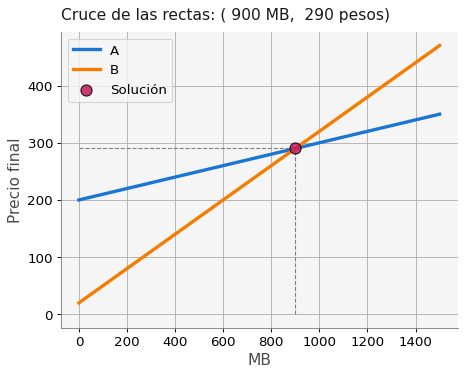

In [23]:
# Gráfica de las líneas de cada compañía
plt.plot(x, PA, lw=3,label = 'A')
plt.plot(x, PB, lw=3,label = 'B')

# Punto de cruce de las líneas rectas
plt.scatter(xsol[0], xsol[1], fc = 'C3', ec ='k', s = 100, alpha=0.85, zorder=5, label='Solución')

# Decoración de la gráfica
plt.xlabel('MB')
plt.ylabel('Precio final')
plt.title('Cruce de las rectas: ({:4.0f} MB, {:4.0f} pesos)'.format(xsol[0], xsol[1]))
plt.vlines(xsol[0], 0, xsol[1], ls='--', lw=1.0, color='gray')
plt.hlines(xsol[1], 0, xsol[0], ls='--', lw=1.0, color='gray')

plt.grid(True)
plt.legend()
plt.show()

Grafica usando la biblioteca `macti.vis`.

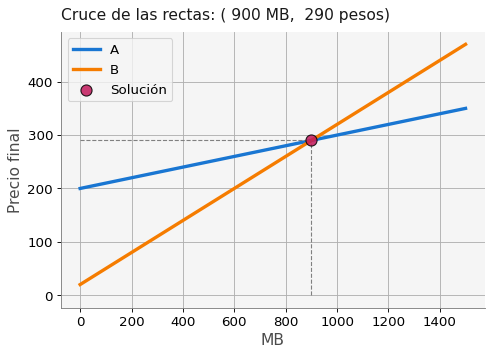

In [25]:
import macti.vis as mvis
axis_par = [dict(xlabel = 'MB', 
                 ylabel='Precio final', 
                 title='Cruce de las rectas: ({:4.0f} MB, {:4.0f} pesos)'.format(xsol[0], xsol[1]))]
vis = mvis.Plotter(1,1,axis_par=axis_par)

# Gráfica de las líneas de cada compañía
vis.plot(1, x, PA, lw=3,label = 'A')
vis.plot(1, x, PB, lw=3,label = 'B')

# Punto de cruce de las líneas rectas
vis.scatter(1, xsol[0], xsol[1], fc = 'C3', ec ='k', s = 100, alpha=0.85, zorder=5, label='Solución')

# Decoración de la gráfica
vis.axes(1).vlines(xsol[0], 0, xsol[1], ls='--', lw=1.0, color='gray')
vis.axes(1).hlines(xsol[1], 0, xsol[0], ls='--', lw=1.0, color='gray')
vis.grid()
vis.legend()
vis.show()